**metropolis harmonic oscillator cube**

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import math
from numpy.random import uniform
from numpy import *

In [29]:
a=1/2
N=20
N_conf=1000
N_cor=20
epsilon=1.4
x=np.zeros(N, 'double')
G=np.zeros((N_cf,N), 'double')
G_avg=np.zeros(N, 'double')
G_avg_square=np.zeros(N, 'double')
G_error=np.zeros(N, 'double')

In [30]:
def update(x):
    N=20
    eps=1.4
    for i in range(N):
        x_old = x[i] 
        S_old = S(i,x)
        noise=uniform(-epsilon,epsilon)
        x[i] = x[i] + noise 
        dS = S(i,x) - S_old # change in action
        if dS>0 and exp(-dS)<random.uniform(0,1):
                x[i] = x_old 

In [31]:
def S(i,x): # harm. osc. S
    N=20
    a=1/2
    jp = (i+1)%N # next site
    jm = (i-1)%N # previous site
    return a*x[i]**2/2 + x[i]*(x[i]-x[jp]-x[jm])/a


In [32]:
def compute_G(x,n):
    g = 0
    N=20
    for i in range(N):
        g = g + (x[i]**3)*(x[(i+n)%N]**3)
    return g/N

In [33]:
for i in range(5*N_cor): # thermalize 
    update(x)
    
for alpha in range(N_conf): # loop on random paths
    for i in range(N_cor):
        update(x)
    for n in range(N):
        G[alpha][n] = compute_G(x,n)
for n in range(N): # compute MC averages
    G_avg[n] = 0
    G_avg_square[n] = 0
    for alpha in range(0,N_cf):
        G_avg[n] += G[alpha][n]
        G_avg_square[n] +=(G[alpha][n])**2
    G_avg[n] = G_avg[n]/N_cf  #mean value on every path of the propagator
    G_avg_square[n]=G_avg_square[n]/N_cf
    G_error[n]=((G_avg_square[n]-(G_avg[n])**2)/N_cf)**(1/2) #error as std deviation
    #print(n*a,G_avg[n],G_error[n]) #print of the result for every point n

0.0 1.6576286994198246 0.08441355633737102
0.5 0.7734775646131632 0.047481730491353936
1.0 0.43080730738998246 0.030460269718185513
1.5 0.25836103880276196 0.022689841741273763
2.0 0.16148567652753296 0.017259323564254123
2.5 0.09628766042974918 0.015433279291307812
3.0 0.06314340052620303 0.01556694490838068
3.5 0.046738271864071555 0.016922331027773598
4.0 0.023992633689359784 0.018746504659682986
4.5 0.01507303477620436 0.021129460241735672
5.0 0.028604516618512554 0.022059353412306203
5.5 0.015073034776204365 0.02112946024173567
6.0 0.023992633689359784 0.018746504659682986
6.5 0.04673827186407154 0.016922331027773598
7.0 0.06314340052620303 0.01556694490838068
7.5 0.09628766042974918 0.015433279291307812
8.0 0.16148567652753296 0.017259323564254123
8.5 0.25836103880276196 0.022689841741273763
9.0 0.43080730738998246 0.030460269718185516
9.5 0.7734775646131631 0.047481730491353936


In [34]:
E_error=np.zeros(N-1, 'double')
dE=np.zeros(N-1, 'double')
t=np.zeros(N-1, 'double')
#exact=ones(N-1, 'double')


In [36]:
for n in range(0,N-1):
    dE[n]=np.log(np.abs(G_avg[n]/G_avg[n+1]))/a
    E_error[n]=(((G_error[n]*G_avg[n+1])/(a*G_avg[n]))**2+((G_error[n+1]*G_avg[n])/(a*G_avg[n+1]))**2)**(1/2)
    t[n]=n*a
    #print(n*a,dE[n],E_error[n])

0.0 1.5244934023739867 0.21822968511684393
0.5 1.1704715141136077 0.12149505301758795
1.0 1.0226058511950786 0.08402727006619408
1.5 0.9398830668312372 0.062084426465572114
2.0 1.0341525493327433 0.055708429076180226
2.5 0.8438636704543554 0.05161118403645635
3.0 0.6016899671198549 0.051203240720542526
3.5 1.3336330028372516 0.07507532740090302
4.0 0.9296789652287013 0.07127080416284477
4.5 -1.2813145161406612 0.08349769040638982
5.0 1.2813145161406607 0.08349769040638978
5.5 -0.9296789652287006 0.07127080416284476
6.0 -1.3336330028372512 0.075075327400903
6.5 -0.6016899671198557 0.05120324072054254
7.0 -0.8438636704543552 0.05161118403645635
7.5 -1.0341525493327435 0.055708429076180226
8.0 -0.9398830668312372 0.062084426465572114
8.5 -1.0226058511950784 0.08402727006619408
9.0 -1.1704715141136077 0.12149505301758795


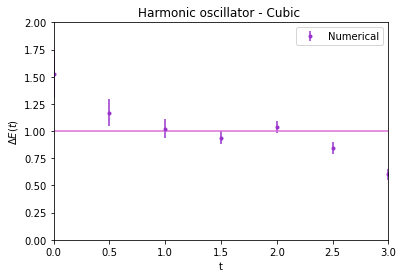

In [37]:
#plt.plot(t,exact,'b',label='Exact')
plt.errorbar(t, dE, yerr=E_error, fmt='.', color='darkorchid', label='Numerical');
plt.axis([0,3,0,2])
plt.legend(loc='upper right')
plt.title('Harmonic oscillator - Cubic ')
plt.xlabel('t')
plt.axhline(y=1, color='orchid', linestyle='-')
plt.ylabel(r'$\Delta E(t)$')
plt.show()